In [2]:
from __future__ import print_function
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import SGD


In [3]:
(xtrain, ytrain), (xtest, ytest)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
train_rank=5000
test_rank = 100
img_rows, img_cols = 28, 28
# indeksi slucajno odabranih  train i test elemenata
train_subset = np.random.choice(xtrain.shape[0], train_rank)
test_subset = np.random.choice(xtrain.shape[0], test_rank)

# train dataset
train_data = xtrain[train_subset]/255.
train_data = train_data.reshape(train_rank, img_rows*img_cols)
train_labels = ytrain[train_subset]

# test dataset
test_data = xtrain[test_subset].reshape(test_rank, img_rows*img_cols)
test_labels = ytrain[test_subset]


In [5]:
#      0 1 2 3 4 5 6 7 8 9
#  2   0 0 1 0 0 0 0 0 0 0
# 5   0 0 0 0 0 1 0 0 0 0


In [6]:
def to_categorical(labels, n):
  retVal = np.zeros((len(labels), n), dtype='int')
  ll=np.array(list(enumerate(labels)))
  retVal[ll[:,0],ll[:,1]] = 1
  return retVal
test=[3,5,9]
print(to_categorical(test,10))

[[0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]]


In [7]:
# train and test sets to categorical
train_out = to_categorical(train_labels, 10)
test_out = to_categorical(test_labels, 10)
print(train_out.shape)
print(train_data.shape)
print(test_out.shape)
print(test_data.shape)

(5000, 10)
(5000, 784)
(100, 10)
(100, 784)


In [8]:
# Model

model = Sequential()
model.add(Dense(20, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))
print(model.summary())

/home/mixie/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,910 (62.15 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

None


In [9]:
optimizer = SGD(learning_rate=0.1,  momentum=0.7)
loss= 'mean_squared_error'
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [10]:
# training
training = model.fit(train_data, train_out, epochs=100,batch_size=400, verbose=1)
print(training.history['loss'][-1])

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1450 - loss: 0.1085  
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3697 - loss: 0.0804 
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5660 - loss: 0.0665 
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6636 - loss: 0.0576 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7034 - loss: 0.0515 
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7364 - loss: 0.0463 
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7522 - loss: 0.0432 
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7622 - loss: 0.0409 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7588 - loss: 0.0404 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7738 - loss: 0.0379 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7807 - loss: 0.0367 
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9054 - loss: 0.0209 
Epoch 69/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9031 - loss: 0.0211 
Epoch 70/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9096 - loss: 0.0204 
Epoch 71/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9021 - loss: 0.0211 
Epoch 72/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9056 - loss: 0.0204 
Epoch 73/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9052 - loss: 0.0203 
Epoch 74/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9110 - loss: 0.0201 
Epoch 75/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9084 - loss: 0.0201 
Epoch 76/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9105 - loss: 0.0199 
Epoch 77/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9105 - loss: 0.0198 
Epoch 78/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9149 - loss: 0.0195 
Epoch 79/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

In [11]:
# evaluate on test data
scores = model.evaluate(test_data, test_out, verbose=1)
print('test', scores)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8174 - loss: 4425.1636 
test [4505.50732421875, 0.8299999833106995]


In [12]:
# evaluate on training data
scores = model.evaluate(train_data, train_out, verbose=1)
print('train', scores)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.9199 - loss: 0.0181
train [0.017563173547387123, 0.9247999787330627]


(784,)


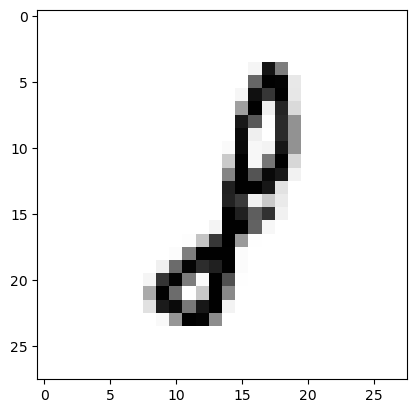

In [13]:
# predikcija
import matplotlib.pyplot as plt
%matplotlib inline

imgN = 7
img = test_data[imgN]
print(img.shape)
img = img.reshape(28,28)

plt.imshow(img, cmap="Greys")

In [14]:
t = np.argmax(model.predict(test_data), axis=-1)
print(t[imgN])
print(t[57])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
1
8


<BarContainer object of 10 artists>

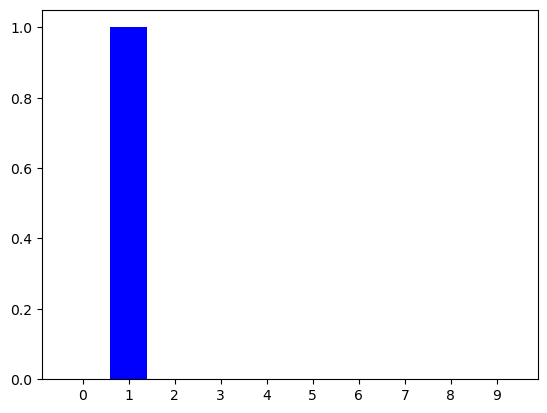

In [15]:
x0=list([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.xticks(x0)
y=to_categorical([t[imgN]],10)
yt=list(y[0])
plt.bar(x0, yt, color="blue")